# Cdk1 RNAi, Cdk1 trapping data

- This code generates the plots in Figure 4G-4I.
- The measurements were done in Imaris and recorded/calculated in excel.  
- Data was visualized using `seaborn` plots.
- There is a summary statistical test table at the end of the notebook. 

In [1]:
# Loading in standard libraries and functions

### --- REMOVE PRINT FUNCTION: --- ### 

# Makes it so any variable or statement on it's own line gets printed w/o print()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

### --- IMPORT LIBRARIES: --- ###

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
#import altair as alt
import os
import glob
import matplotlib.patches as mpatches
# We're also going to tell Jupyter to use inline plotting instead of notebook plotting
# It basically means you don't have to use plt.show() in every cell
%matplotlib inline
import re
from scipy.stats import chisquare

### --- CONJ 510 SUMMARY TABLES: --- ### 

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

#summary = fil.groupby('condition').agg(['mean', 'std', 'min', 'max', 'median', percentile(25), percentile(75), 'skew'])
#summary

### --- IMPORT SCIPY T TEST: --- ###

from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t

### --- IND. T-TEST FUNCTION: --- ###
# source: https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/

def independent_ttest(data1, data2, alpha):
    # calculate means
    mean1, mean2 = mean(data1), mean(data2)
    # calculate standard errors
    se1, se2 = sem(data1), sem(data2)
    # standard error on the difference between the samples
    sed = sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

### --- 3D CARTESIAN DISTANCE FUNCTION: --- ###

# AB = sqrt((x2 - x1)^2  +   (y2 - y1)^2   +   (z2 - z1)^2)

def cart3D_dist(x1, x2, y1, y2, z1, z2):
    x_dif = x2-x1
    y_dif = y2-y1
    z_dif = z2-z1
    x_sqr = x_dif**2
    y_sqr = y_dif**2
    z_sqr = z_dif**2
    dist = sqrt(x_sqr + y_sqr + z_sqr)
    return dist

### --- FINDING UNIQUE COMBINATIONS FUNCTION: --- ###

# Based on the mathematical concept of finding unique combinations without selecting the same option again. 
# n is the dataset to be pulled from
# r is the number of data to select from the dataset 
def find_combos(n, r):
    return (math.factorial(n))/((math.factorial(r))*(math.factorial(n-r)))

### --- ANGLE BETWEEN TWO 2D LINES FUNCTION: --- ###

import math

# defining function for calculating angle of rotation between 2 2D lines
def find_angle(m1, m2): 
    angle = math.degrees(math.atan(abs((m1 - m2)/(1 + m1*m2))))
    return angle

### --- SLOPE BETWEEN TWO POINTS ON A 2D LINE FUNCTION: --- ###

# defining a function to calculate slope

def find_slope(y2, y1, x2, x1):
    m = (y2 - y1)/(x2 - x1)
    return m

### --- SET UP FOR A FIGURE: --- ###

# fig1, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(ncols = 2,
#                                                         nrows = 3,
#                                                         sharex = False,
#                                                         sharey = True,
#                                                         figsize = (40,50))

#titlefont = 40 # sets font size 
#axisfont = 30
#plt.rc('xtick', labelsize=25) 
#plt.rc('ytick', labelsize=25) 
#palette = ['#5DADE2', '#EC7063', '#F8C471']
#fig_title = 'ACD Timing in WT and pp4KO neuroblasts'


### --- SET UP FOR CUSTOM LEGENDS --- ###

#colors = ["g", "w"]
#texts = ["Green Data Description", "RedData Description"]
#patches = [ mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
#plt.legend(handles=patches, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=2 )


### --- color palettes --- ###

# p = ['#3386FF', '#FF5733'] # classic blue and orange from the rotation saga
# ['#3386FF', '#143566', 'grey'] # hex codes for blue, dark blue, grey
# ['#FF5733', '#99341e', 'grey'] # hex codes for orange, dark orange, grey
# ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness

### --- PLOT STYLES: --- ###

plt.style.use('fast') # uses seaborn style
#sns.set_style('white') # uses blank white background style (to copy PRISM)

### --- REMOVING DATAFRAME VIEW LIMITS --- ###
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Command line cells to ensure code is in right directory. 

In [2]:
pwd

'/Users/rcsegura/Desktop/PP4_github/Figure4'

In [3]:
ls

FIG4.ipynb      Fig4 data.xlsx  readme.md


In [4]:
home_dir = '/Users/rcsegura/Desktop/PP4_github/Figure4' # home directory
#figs_dir = home_dir + '/figs/' # directory to hold the figure output
#data_dir = home_dir + '/data/' # directory holding the data
#outs_dir = home_dir + '/output/' # directory to save any output csv files to 

In [5]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('Fig4 data.xlsx', sheet_name = 'Figure 4F, G')
data.head(5)

,file name,genotype,nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 2X MTOC",1,1,interphase,167,168,117,NaN,67,68,17,NaN,3.941176,4.000000,0.985294
1,NaN,"cdk1 RNAi, 0X MTOC",4,24,interphase,138,132,127,NaN,38,32,27,NaN,1.407407,1.185185,1.187500
2,NaN,"cdk1 RNAi, 2X MTOC",5,11,interphase,135,130,116,NaN,35,30,16,NaN,2.187500,1.875000,1.166667
3,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 0X MTOC",6,24,interphase,125,118,119,NaN,25,18,19,NaN,1.315789,0.947368,1.388889
4,NaN,"cdk1 RNAi, 2X MTOC",7,7,interphase,240,210,131,NaN,140,110,31,NaN,4.516129,3.548387,1.272727


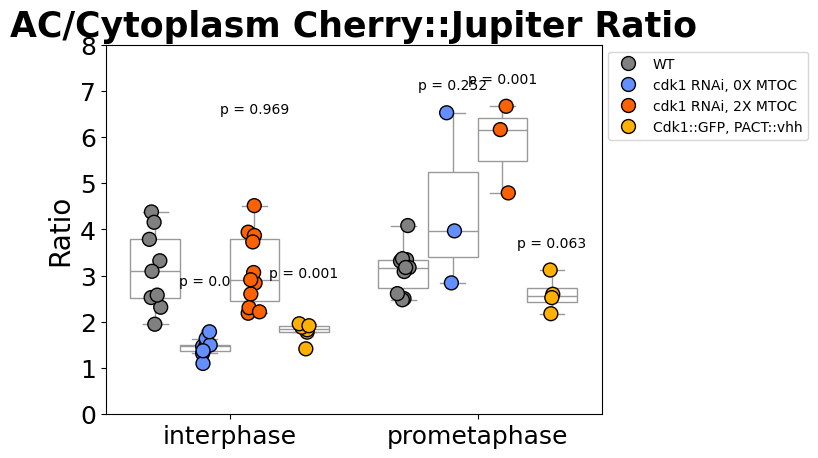

In [6]:
# plotting

p = ['grey', '#648FFF', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness
po = ['interphase', 'prometaphase']
ho = ['WT', 'cdk1 RNAi, 0X MTOC', 'cdk1 RNAi, 2X MTOC', 'Cdk1::GFP, PACT::vhh']
tick_size = 18
axis_size = 20
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype', 
             order = po, hue_order = ho, palette = p,
             size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/Cyto RFP', hue = 'genotype', 
             order = po, hue_order = ho, palette = ['w','w','w','w'],
             dodge = True, legend = False)

plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.xlabel('')
plt.ylabel('Ratio', fontsize = axis_size)
plt.title('AC/Cytoplasm Cherry::Jupiter Ratio', fontsize = title_size, fontweight = 'bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,8)


# stats

# interphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[1]) & (data['phase']=='interphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (-0.1, param2.max()+1), ha = 'center')

# interphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[2]) & (data['phase']=='interphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.1, param2.max()+2), ha = 'center')

# interphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[3]) & (data['phase']=='interphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.3, param2.max()+1), ha = 'center')

# metaphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[1]) & (data['phase']=='prometaphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.9, param2.max()+0.5), ha = 'center')

# metaphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[2]) & (data['phase']=='prometaphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.1, param2.max()+0.5), ha = 'center')

# metaphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto RFP']
param2 = data[(data['genotype']==ho[3]) & (data['phase']=='prometaphase')]['AC/Cyto RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.3, param2.max()+0.5), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('AC Cytoplasm ratio.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC Cytoplasm ratio.svg', dpi = 900, bbox_inches = 'tight')
plt.show();


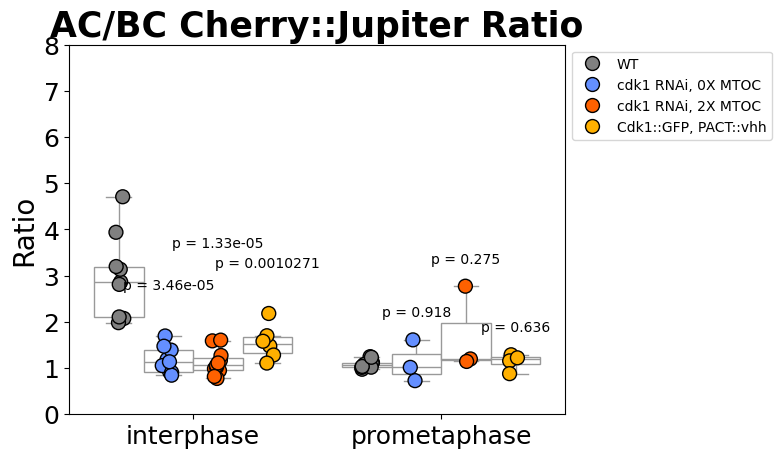

In [7]:
# plotting

p = ['grey', '#648FFF', '#FE6100', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness
po = ['interphase', 'prometaphase']
ho = ['WT', 'cdk1 RNAi, 0X MTOC', 'cdk1 RNAi, 2X MTOC', 'Cdk1::GFP, PACT::vhh']
tick_size = 18
axis_size = 20
title_size = 25

sns.stripplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype', 
             order = po, hue_order = ho, palette = p,
             size = 10, linewidth = 1, edgecolor = 'k',
             dodge = True, legend = True)

sns.boxplot(data = data, x = 'phase', y = 'AC/BC RFP', hue = 'genotype', 
             order = po, hue_order = ho, palette = ['w','w','w','w'],
             dodge = True, legend = False)

plt.xticks(size = tick_size)
plt.yticks(size = tick_size)
plt.xlabel('')
plt.ylabel('Ratio', fontsize = axis_size)
plt.title('AC/BC Cherry::Jupiter Ratio', fontsize = title_size, fontweight = 'bold')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0,8)


# stats

# interphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[1]) & (data['phase']=='interphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"p = {a}", xy = (-0.1, param2.max()+1), ha = 'center')

# interphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[2]) & (data['phase']=='interphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"p = {a}", xy = (0.1, param2.max()+2), ha = 'center')

# interphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[3]) & (data['phase']=='interphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 7)
plt.annotate(f"p = {a}", xy = (0.3, param2.max()+1), ha = 'center')

# metaphase wt vs 37C
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[1]) & (data['phase']=='prometaphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (0.9, param2.max()+0.5), ha = 'center')

# metaphase wt vs 23C
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[2]) & (data['phase']=='prometaphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.1, param2.max()+0.5), ha = 'center')

# metaphase wt vs S131A
param1 = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/BC RFP']
param2 = data[(data['genotype']==ho[3]) & (data['phase']=='prometaphase')]['AC/BC RFP']
a = np.round(independent_ttest(param1, param2, 0.05)[3], decimals = 3)
plt.annotate(f"p = {a}", xy = (1.3, param2.max()+0.5), ha = 'center')

#os.chdir(figs_dir)
#plt.savefig('AC BC ratio.png', dpi = 900, bbox_inches = 'tight')
#plt.savefig('AC BC ratio.svg', dpi = 900, bbox_inches = 'tight')
plt.show();


In [8]:
os.chdir(home_dir)
counts = pd.read_excel('Fig4 data.xlsx', sheet_name = 'Figure 4H')
counts

,genotype,phenotype,number,percent
0,WT,WT,20,1.000000
1,WT,0X,0,0.000000
2,WT,2X,0,0.000000
3,cdk1 RNAi,WT,14,0.400000
4,cdk1 RNAi,0X,9,0.257143
5,cdk1 RNAi,2X,12,0.342857
6,"Cdk1::GFP, PACT::vhh",WT,4,0.400000
7,"Cdk1::GFP, PACT::vhh",0X,6,0.600000
8,"Cdk1::GFP, PACT::vhh",2X,0,0.000000


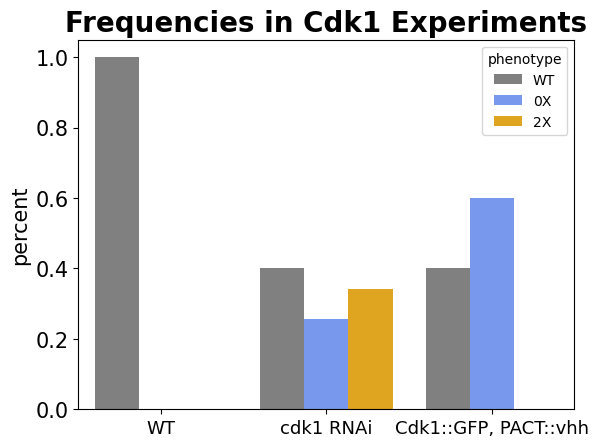

In [9]:
#plotting
p = ['grey', '#648FFF', '#FFB000'] #blue, purple, magenta, orange, and yellow palette for color blindness
sns.barplot(x = 'genotype', y = 'percent', data = counts,
           hue = 'phenotype', palette = p)

plt.yticks(size = 15)
plt.xticks(size = 13)
plt.title('Frequencies in Cdk1 Experiments', fontweight = 'bold', fontsize = 20)
plt.ylabel('percent', fontsize = 15)
plt.xlabel('')

#plt.savefig('new_counts.svg', dpi = 600, bbox_inches = 'tight')
plt.show();

# Cdk1 count stats

In [10]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'test',
                                      'control n', 'experimental n',
                                     'test statistic', 'degrees of freedom', 'p-value'])
stats_table

,control variable,experimental variable,test,control n,experimental n,test statistic,degrees of freedom,p-value


In [11]:
# test# = control genotype, experimental genotype,
        # control percents, experimental counts, wt counts

t1 = ['WT', 'cdk1 RNAi', # genotypes
     0.98, 0.01, 0.01, # WT frequency
     14, 9, 2, # experimental counts
     20, 0, 0] # WT counts

t2 = ['WT', 'Cdk1 Trapping', 
     0.98, 0.01, 0.01, 
     4, 6, 0,
     20, 0, 0]

tests = [t1, t2]

In [12]:
t1[5:8]

[14, 9, 2]

In [13]:
for i in range(0, len(tests)):
    stats_table.loc[i, 'control variable'] = tests[i][0]
    stats_table.loc[i, 'experimental variable'] = tests[i][1]

    observed = tests[i][5:8]  # extracts counts for experimental frequencies
    
    # WT distribution scaled to match total counts in the experimental condition
    wt_percent = tests[i][2:5]  # WT percentages 
    total_counts = sum(observed)  # Total counts in experimental condition
    expected = [p * total_counts for p in wt_percent]
    # Perform chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
    
    stats_table.loc[i, 'control n'] = np.sum(tests[i][8:])
    stats_table.loc[i, 'experimental n'] = np.sum(tests[i][5:8])
    stats_table.loc[i, 'test statistic'] = chi2_stat
    stats_table.loc[i, 'p-value'] = p_value
    stats_table.loc[i, 'degrees of freedom'] = len(observed) - 1
    
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    elif p_value > 0.05:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig
    
stats_table['test'] = "Chi^2 goodness of fit"
stats_table

,control variable,experimental variable,test,control n,experimental n,test statistic,degrees of freedom,p-value,significance
0,WT,cdk1 RNAi,Chi^2 goodness of fit,20,25,323.0,2,0.0,****
1,WT,Cdk1 Trapping,Chi^2 goodness of fit,20,10,351.632653,2,0.0,****


# Stats Table

In [14]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('Fig4 data.xlsx', sheet_name = 'Figure 4F, G')
data.head(5)

,file name,genotype,nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 2X MTOC",1,1,interphase,167,168,117,NaN,67,68,17,NaN,3.941176,4.000000,0.985294
1,NaN,"cdk1 RNAi, 0X MTOC",4,24,interphase,138,132,127,NaN,38,32,27,NaN,1.407407,1.185185,1.187500
2,NaN,"cdk1 RNAi, 2X MTOC",5,11,interphase,135,130,116,NaN,35,30,16,NaN,2.187500,1.875000,1.166667
3,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 0X MTOC",6,24,interphase,125,118,119,NaN,25,18,19,NaN,1.315789,0.947368,1.388889
4,NaN,"cdk1 RNAi, 2X MTOC",7,7,interphase,240,210,131,NaN,140,110,31,NaN,4.516129,3.548387,1.272727


In [15]:
stats_table = pd.DataFrame(columns = ['control variable', 'experimental variable', 'phase', 'test', 'y-value',
                                      'control n', 'experimental n',
                                      'control mean', 'experimental mean',
                                     'control stdev', 'experimental stdev',
                                     'test statistic', 'degrees of freedom', 
                                     'critical value', 'p-value'])

pd.set_option('display.float_format', '{:.2E}'.format) # enables scientific notation

stats_table

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value


In [16]:
# test# = [control genotype, experimental genotype, phase, y-value]
t1 = ['WT', 'cdk1 RNAi, 0X MTOC', 'interphase', 'AC/Cyto RFP']
t2 = ['WT', 'cdk1 RNAi, 0X MTOC', 'interphase', 'AC/BC RFP']
t3 = ['WT', 'cdk1 RNAi, 0X MTOC', 'prometaphase', 'AC/Cyto RFP']
t4 = ['WT', 'cdk1 RNAi, 0X MTOC', 'prometaphase', 'AC/BC RFP']

t5 = ['WT', 'cdk1 RNAi, 2X MTOC', 'interphase', 'AC/Cyto RFP']
t6 = ['WT', 'cdk1 RNAi, 2X MTOC', 'interphase', 'AC/BC RFP']
t7 = ['WT', 'cdk1 RNAi, 2X MTOC', 'prometaphase', 'AC/Cyto RFP']
t8 = ['WT', 'cdk1 RNAi, 2X MTOC', 'prometaphase', 'AC/BC RFP']

t9 = ['WT', 'Cdk1::GFP, PACT::vhh', 'interphase', 'AC/Cyto RFP']
t10 = ['WT', 'Cdk1::GFP, PACT::vhh', 'interphase', 'AC/BC RFP']
t11 = ['WT', 'Cdk1::GFP, PACT::vhh', 'prometaphase', 'AC/Cyto RFP']
t12 = ['WT', 'Cdk1::GFP, PACT::vhh', 'prometaphase', 'AC/BC RFP']

tests = [t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12]

In [17]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro, levene

# Function to determine appropriate test
def is_parametric(data1, data2, alpha=0.05):
    # Check if data is numeric
    continuous = all(isinstance(x, (int, float)) for x in data1) and \
                 all(isinstance(x, (int, float)) for x in data2)
    if not continuous:
        return {'suitable_for_ttest': False, 'suggested_test': "Mann-Whitney U test"}

    # Shapiro-Wilk test for normality
    normality1 = shapiro(data1).pvalue > alpha
    normality2 = shapiro(data2).pvalue > alpha
    normality = normality1 and normality2

    # Levene's test for equal variances
    equal_variance = levene(data1, data2).pvalue > alpha

    # Determine if suitable for t-test
    suitable_for_ttest = normality and equal_variance
    suggested_test = "t-test" if suitable_for_ttest else "Mann-Whitney U test"

    return {'suitable_for_ttest': suitable_for_ttest, 'suggested_test': suggested_test}

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Determine appropriate test
    test_result = is_parametric(param1, param2)
    suggested_test = test_result['suggested_test']

    if suggested_test == "t-test":
        t_stat, p_value = ttest_ind(param1, param2)
        stats_table.loc[i, 'test'] = "Unpaired Student's T-test"
        stats_table.loc[i, 'test statistic'] = t_stat
        stats_table.loc[i, 'degrees of freedom'] = len(param1) + len(param2) - 2
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this summary
    else:
        u_stat, p_value = mannwhitneyu(param1, param2, alternative='two-sided')
        stats_table.loc[i, 'test'] = "Mann-Whitney U Test"
        stats_table.loc[i, 'test statistic'] = u_stat
        stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for this test
        stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for this test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
# saves output stats table
#os.chdir(outs_dir)
#stats_table.to_csv('FIG4 Cdk1 stats.csv')
#os.chdir(home_dir)

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"cdk1 RNAi, 0X MTOC",interphase,Mann-Whitney U Test,AC/Cyto RFP,9,9,3.12E+00,1.45E+00,8.52E-01,1.94E-01,8.10E+01,N/A,N/A,4.12295e-04,***
1,WT,"cdk1 RNAi, 0X MTOC",interphase,Mann-Whitney U Test,AC/BC RFP,9,9,2.98E+00,1.18E+00,9.08E-01,2.89E-01,8.10E+01,N/A,N/A,4.12295e-04,***
2,WT,"cdk1 RNAi, 0X MTOC",prometaphase,Unpaired Student's T-test,AC/Cyto RFP,10,3,3.12E+00,4.45E+00,4.87E-01,1.89E+00,-2.20E+00,11,N/A,4.97092e-02,*
3,WT,"cdk1 RNAi, 0X MTOC",prometaphase,Mann-Whitney U Test,AC/BC RFP,10,3,1.09E+00,1.12E+00,9.07E-02,4.50E-01,1.90E+01,N/A,N/A,5.73427e-01,ns
4,WT,"cdk1 RNAi, 2X MTOC",interphase,Unpaired Student's T-test,AC/Cyto RFP,9,11,3.12E+00,3.11E+00,8.52E-01,7.93E-01,4.03E-02,18,N/A,9.68320e-01,ns
5,WT,"cdk1 RNAi, 2X MTOC",interphase,Mann-Whitney U Test,AC/BC RFP,9,11,2.98E+00,1.12E+00,9.08E-01,2.74E-01,9.90E+01,N/A,N/A,1.97094e-04,***
6,WT,"cdk1 RNAi, 2X MTOC",prometaphase,Unpaired Student's T-test,AC/Cyto RFP,10,3,3.12E+00,5.87E+00,4.87E-01,9.70E-01,-6.93E+00,11,N/A,2.48796e-05,****
7,WT,"cdk1 RNAi, 2X MTOC",prometaphase,Unpaired Student's T-test,AC/BC RFP,10,3,1.09E+00,1.70E+00,9.07E-02,9.25E-01,-2.32E+00,11,N/A,4.08951e-02,*
8,WT,"Cdk1::GFP, PACT::vhh",interphase,Mann-Whitney U Test,AC/Cyto RFP,9,6,3.12E+00,1.80E+00,8.52E-01,1.97E-01,5.30E+01,N/A,N/A,7.99201e-04,***
9,WT,"Cdk1::GFP, PACT::vhh",interphase,Unpaired Student's T-test,AC/BC RFP,9,6,2.98E+00,1.56E+00,9.08E-01,3.72E-01,3.61E+00,13,N/A,3.16951e-03,**


In [18]:
os.chdir(home_dir)

In [19]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('Fig4 data.xlsx', sheet_name = 'Figure 4F, G')
data.head(5)

,file name,genotype,nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 2X MTOC",1,1,interphase,167,168,117,NaN,67,68,17,NaN,3.94E+00,4.00E+00,9.85E-01
1,NaN,"cdk1 RNAi, 0X MTOC",4,24,interphase,138,132,127,NaN,38,32,27,NaN,1.41E+00,1.19E+00,1.19E+00
2,NaN,"cdk1 RNAi, 2X MTOC",5,11,interphase,135,130,116,NaN,35,30,16,NaN,2.19E+00,1.88E+00,1.17E+00
3,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 0X MTOC",6,24,interphase,125,118,119,NaN,25,18,19,NaN,1.32E+00,9.47E-01,1.39E+00
4,NaN,"cdk1 RNAi, 2X MTOC",7,7,interphase,240,210,131,NaN,140,110,31,NaN,4.52E+00,3.55E+00,1.27E+00


In [32]:
wt_interphase = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True)
wt_prometa = data[(data['genotype']=='WT') & (data['phase']=='prometaphase')]['AC/Cyto RFP'].reset_index(drop = True)

cdk1_0X_interphase = data[(data['genotype']=='cdk1 RNAi, 0X MTOC') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True)
cdk1_0X_prometa = data[(data['genotype']=='cdk1 RNAi, 0X MTOC') & (data['phase']=='prometaphase')]['AC/Cyto RFP'].reset_index(drop = True)

cdk1_2X_interphase = data[(data['genotype']=='cdk1 RNAi, 2X MTOC') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True)
cdk1_2X_prometa = data[(data['genotype']=='cdk1 RNAi, 2X MTOC') & (data['phase']=='prometaphase')]['AC/Cyto RFP'].reset_index(drop = True)

trap_interphase = data[(data['genotype']=='Cdk1::GFP, PACT::vhh') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True)
trap_prometa = data[(data['genotype']=='Cdk1::GFP, PACT::vhh') & (data['phase']=='prometaphase')]['AC/Cyto RFP'].reset_index(drop = True)

In [34]:
prism = pd.DataFrame()
prism['WT interphase'] = wt_interphase
prism['WT prometaphase'] = wt_prometa
prism['Cdk1 0X interphase'] = cdk1_0X_interphase
prism['Cdk1 0X prometaphase'] = cdk1_0X_prometa
prism['Cdk1 2X interphase'] = cdk1_2X_interphase
prism['Cdk1 2X prometaphase'] = cdk1_2X_prometa
prism['Cdk1 trapping interphase'] = trap_interphase
prism['Cdk1 trapping prometaphase'] = trap_prometa
prism.to_csv('cdk1 prism.csv')

In [35]:
prism

,WT interphase,WT prometaphase,Cdk1 0X interphase,Cdk1 0X prometaphase,Cdk1 2X interphase,Cdk1 2X prometaphase,Cdk1 trapping interphase,Cdk1 trapping prometaphase
0,2.32E+00,3.35E+00,1.41E+00,6.53E+00,3.94E+00,4.79E+00,1.78E+00,2.18E+00
1,4.38E+00,4.08E+00,1.32E+00,2.84E+00,2.19E+00,6.16E+00,1.83E+00,2.60E+00
2,1.95E+00,3.32E+00,1.47E+00,3.97E+00,4.52E+00,6.67E+00,1.88E+00,2.52E+00
3,2.53E+00,2.50E+00,1.10E+00,NaN,2.84E+00,NaN,1.42E+00,3.12E+00
4,4.16E+00,3.37E+00,1.47E+00,NaN,3.87E+00,NaN,1.96E+00,NaN
5,3.79E+00,3.18E+00,1.64E+00,NaN,3.73E+00,NaN,1.92E+00,NaN
6,2.58E+00,3.09E+00,1.50E+00,NaN,2.60E+00,NaN,NaN,NaN
7,3.32E+00,2.48E+00,1.38E+00,NaN,2.31E+00,NaN,NaN,NaN
8,3.10E+00,3.18E+00,1.79E+00,NaN,3.07E+00,NaN,NaN,NaN


# Redoing Stats to be Kruskal-Wallis tests with Dunn's post-hoc test. 

In [93]:
# reading in data
os.chdir(home_dir)
data = pd.read_excel('Fig4 data.xlsx', sheet_name = 'Figure 4F, G')
data.head(5)

,file name,genotype,nb,frame,phase,AC RFP,BC RFP,Cyto RFP,Unnamed: 8,AC RFP sub,BC RFP sub,Cyto RFP sub,Unnamed: 12,AC/Cyto RFP,BC/Cyto RFP,AC/BC RFP
0,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 2X MTOC",1,1,interphase,167,168,117,NaN,67,68,17,NaN,3.94E+00,4.00E+00,9.85E-01
1,NaN,"cdk1 RNAi, 0X MTOC",4,24,interphase,138,132,127,NaN,38,32,27,NaN,1.41E+00,1.19E+00,1.19E+00
2,NaN,"cdk1 RNAi, 2X MTOC",5,11,interphase,135,130,116,NaN,35,30,16,NaN,2.19E+00,1.88E+00,1.17E+00
3,006xRCS132 cdk1 RNAi_2024-02-14_RCS live cell ...,"cdk1 RNAi, 0X MTOC",6,24,interphase,125,118,119,NaN,25,18,19,NaN,1.32E+00,9.47E-01,1.39E+00
4,NaN,"cdk1 RNAi, 2X MTOC",7,7,interphase,240,210,131,NaN,140,110,31,NaN,4.52E+00,3.55E+00,1.27E+00


## Kruskal-Wallis test for Interphase, prometaphase data:

In [94]:
from scipy.stats.mstats import kruskal # imports test function
a = data[(data['genotype']=='WT') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True).to_list()
b = data[(data['genotype']=='cdk1 RNAi, 0X MTOC') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True).to_list()
c = data[(data['genotype']=='cdk1 RNAi, 2X MTOC') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True).to_list()
d = data[(data['genotype']=='Cdk1::GFP, PACT::vhh') & (data['phase']=='interphase')]['AC/Cyto RFP'].reset_index(drop = True).to_list()

kw_test = kruskal(a, b, c, d)
kw_test

KruskalResult(statistic=25.903799903799893, pvalue=9.990122330208831e-06)

In [95]:
import pandas as pd
from scipy.stats import kruskal  # Use correct import

# Define test parameters
phases = ['interphase', 'prometaphase']  # List of phases to test
y_values = ['AC/Cyto RFP', 'AC/BC RFP']  # List of y-values to test
genotypes = ['WT', 'cdk1 RNAi, 0X MTOC', 'cdk1 RNAi, 2X MTOC', 'Cdk1::GFP, PACT::vhh']  # Genotypes to compare

# Create an empty list to store results
results = []

# Iterate through each phase and y-value
for phase in phases:
    for y_value in y_values:
        # Extract data for each genotype
        group_data = [data[(data['genotype'] == genotype) & (data['phase'] == phase)][y_value].dropna().tolist() for genotype in genotypes]
        
        # Ensure at least two groups have data
        if sum(len(g) > 0 for g in group_data) > 1:
            # Perform Kruskal-Wallis test
            kw_stat, p_value = kruskal(*group_data)

            # Determine significance
            if p_value < 0.0001:
                sig = "****"
            elif p_value < 0.001:
                sig = "***"
            elif p_value < 0.01:
                sig = "**"
            elif p_value < 0.05:
                sig = "*"
            else:
                sig = "ns"

            # Append results as a dictionary
            results.append({
                'phase': phase,
                'y-value': y_value,
                'H-statistic': kw_stat,
                'p-value': p_value,
                'significance': sig
            })

# Convert list of dictionaries to DataFrame
results_df = pd.DataFrame(results)

# Display the results
results_df
results_df.to_csv('wk-tests.csv')

,phase,y-value,H-statistic,p-value,significance
0,interphase,AC/Cyto RFP,2.59E+01,9.99E-06,****
1,interphase,AC/BC RFP,2.21E+01,6.21E-05,****
2,prometaphase,AC/Cyto RFP,1.02E+01,1.71E-02,*
3,prometaphase,AC/BC RFP,3.28E+00,3.51E-01,ns


## Dunn's test for multiple comparisons for interphase data:

In [96]:
import pandas as pd
import numpy as np
from scikit_posthocs import posthoc_dunn

# Iterate through tests
for i, test_params in enumerate(tests):
    control_var, experimental_var, phase, y_value = test_params

    # Subset data for the current test
    param1 = data[(data['genotype'] == control_var) & (data['phase'] == phase)][y_value].dropna()
    param2 = data[(data['genotype'] == experimental_var) & (data['phase'] == phase)][y_value].dropna()

    # Populate descriptive stats
    stats_table.loc[i, 'control variable'] = control_var
    stats_table.loc[i, 'experimental variable'] = experimental_var
    stats_table.loc[i, 'phase'] = phase
    stats_table.loc[i, 'y-value'] = y_value
    stats_table.loc[i, 'control n'] = len(param1)
    stats_table.loc[i, 'experimental n'] = len(param2)
    stats_table.loc[i, 'control mean'] = param1.mean()
    stats_table.loc[i, 'experimental mean'] = param2.mean()
    stats_table.loc[i, 'control stdev'] = param1.std()
    stats_table.loc[i, 'experimental stdev'] = param2.std()

    # Create a DataFrame for Dunn's test
    df = pd.DataFrame({
        'values': np.concatenate([param1, param2]),
        'groups': ['control'] * len(param1) + ['experimental'] * len(param2)
    })

    # Perform Dunn's test (no p-value correction)
    dunn_results = posthoc_dunn(df, val_col='values', group_col='groups', p_adjust=None)

    # Extract p-value
    p_value = dunn_results.loc['control', 'experimental']

    stats_table.loc[i, 'test'] = "Dunn’s Test (No Correction)"
    stats_table.loc[i, 'test statistic'] = "N/A"  # Dunn's test does not return a direct test statistic
    stats_table.loc[i, 'degrees of freedom'] = "N/A"  # Not applicable for Dunn’s test
    stats_table.loc[i, 'critical value'] = "N/A"  # Not applicable for Dunn’s test

    # Record p-value in scientific notation
    stats_table.loc[i, 'p-value'] = f"{p_value:.5e}"

    # Add significance stars
    if p_value < 0.0001:
        sig = "****"
    elif p_value < 0.001:
        sig = "***"
    elif p_value < 0.01:
        sig = "**"
    elif p_value < 0.05:
        sig = "*"
    else:
        sig = "ns"
    stats_table.loc[i, 'significance'] = sig

# Display the stats table
stats_table
stats_table.to_csv('Fig4 Dunn test.csv')

,control variable,experimental variable,phase,test,y-value,control n,experimental n,control mean,experimental mean,control stdev,experimental stdev,test statistic,degrees of freedom,critical value,p-value,significance
0,WT,"cdk1 RNAi, 0X MTOC",interphase,Dunn’s Test (No Correction),AC/Cyto RFP,9,9,3.12E+00,1.45E+00,8.52E-01,1.94E-01,N/A,N/A,N/A,3.48575e-04,***
1,WT,"cdk1 RNAi, 0X MTOC",interphase,Dunn’s Test (No Correction),AC/BC RFP,9,9,2.98E+00,1.18E+00,9.08E-01,2.89E-01,N/A,N/A,N/A,3.48575e-04,***
2,WT,"cdk1 RNAi, 0X MTOC",prometaphase,Dunn’s Test (No Correction),AC/Cyto RFP,10,3,3.12E+00,4.45E+00,4.87E-01,1.89E+00,N/A,N/A,N/A,2.36724e-01,ns
3,WT,"cdk1 RNAi, 0X MTOC",prometaphase,Dunn’s Test (No Correction),AC/BC RFP,10,3,1.09E+00,1.12E+00,9.07E-02,4.50E-01,N/A,N/A,N/A,4.98962e-01,ns
4,WT,"cdk1 RNAi, 2X MTOC",interphase,Dunn’s Test (No Correction),AC/Cyto RFP,9,11,3.12E+00,3.11E+00,8.52E-01,7.93E-01,N/A,N/A,N/A,9.09269e-01,ns
5,WT,"cdk1 RNAi, 2X MTOC",interphase,Dunn’s Test (No Correction),AC/BC RFP,9,11,2.98E+00,1.12E+00,9.08E-01,2.74E-01,N/A,N/A,N/A,1.69439e-04,***
6,WT,"cdk1 RNAi, 2X MTOC",prometaphase,Dunn’s Test (No Correction),AC/Cyto RFP,10,3,3.12E+00,5.87E+00,4.87E-01,9.70E-01,N/A,N/A,N/A,1.12299e-02,*
7,WT,"cdk1 RNAi, 2X MTOC",prometaphase,Dunn’s Test (No Correction),AC/BC RFP,10,3,1.09E+00,1.70E+00,9.07E-02,9.25E-01,N/A,N/A,N/A,6.29791e-02,ns
8,WT,"Cdk1::GFP, PACT::vhh",interphase,Dunn’s Test (No Correction),AC/Cyto RFP,9,6,3.12E+00,1.80E+00,8.52E-01,1.97E-01,N/A,N/A,N/A,2.18304e-03,**
9,WT,"Cdk1::GFP, PACT::vhh",interphase,Dunn’s Test (No Correction),AC/BC RFP,9,6,2.98E+00,1.56E+00,9.08E-01,3.72E-01,N/A,N/A,N/A,4.67773e-03,**
